# 고정비율 투자법 그림 3-10

1. 마음에 드는 우량주 선택(예: 삼성전자)
2. 선정한 종목 매수(단, 투자 자금의 10%만 매수, 나머지 90%는 단기 국고채 ETF에 투자)
3. 매달 마지막 거래일에 주식:국고채 비중 = 1:9 로 리밸런싱
4. 
그림 3-15 코스피지수 변동성 조절 포트폴리오

In [1]:
from settings import *

In [2]:
sec = fdr.DataReader("005930")[['Close']]

In [3]:
sec

,Close
Date,
1997-12-19,745
1997-12-20,751
1997-12-22,740
1997-12-23,681
1997-12-24,627
...,...
2022-01-24,75100
2022-01-25,74000
2022-01-26,73300


In [4]:
sec['1997-12']

,Close
Date,
1997-12-19,745
1997-12-20,751
1997-12-22,740
1997-12-23,681
1997-12-24,627
1997-12-26,677
1997-12-27,686


In [5]:
sec['2021-12'].tail()

,Close
Date,
2021-12-24,80500
2021-12-27,80200
2021-12-28,80300
2021-12-29,78800
2021-12-30,78300


In [6]:
s = '1997-12-27'
e = '2021-12-30'

In [7]:
data = pd.DataFrame()
data['SEC'] = sec.copy()
data = data[s:e]
dd = pd.DataFrame()
dd.index = pd.date_range(s, e, freq='D')
denominator = len(pd.date_range(s, e, freq='D'))/len(pd.date_range(s, e, freq='Y'))
dd['현금'] = pow(1.03, 1/denominator)
dd['현금'] = dd['현금'].shift(1, fill_value=1.0)
dd['현금'] = dd['현금'].cumprod()
#%%
data = pd.merge(data, dd, left_index=True, right_index=True, how='left')

In [8]:
data

,SEC,현금
Date,,
1997-12-27,686,1.000
1998-01-03,735,1.001
1998-01-05,777,1.001
1998-01-06,784,1.001
1998-01-07,799,1.001
...,...,...
2021-12-24,80500,2.032
2021-12-27,80200,2.032
2021-12-28,80300,2.032


In [12]:
def strategy(name, data, stock_w, cash_w):
    s = bt.Strategy(name, 
            [
                bt.algos.RunMonthly(run_on_end_of_period=True),
                bt.algos.SelectAll(),
                bt.algos.WeighSpecified(SEC=stock_w, 현금=cash_w),
#                 PrintTempWeights(),
                bt.algos.Rebalance(),
                # bt.algos.PrintInfo('{now} {name} {_price} {temp} \n{_universe}')
            ])

    return bt.Backtest(s, data, initial_capital=100000000.0)

In [13]:
t1 = strategy("t1",   data, 0.1, 0.9) 

In [14]:
r1 = bt.run(t1)

In [15]:
r1.display()

Stat                 t1
-------------------  ----------
Start                1997-12-26
End                  2021-12-30
Risk-free rate       0.00%

Total Return         267.16%
Daily Sharpe         1.35
Daily Sortino        2.45
CAGR                 5.57%
Max Drawdown         -8.14%
Calmar Ratio         0.68

MTD                  1.20%
3m                   1.28%
6m                   1.11%
YTD                  2.42%
1Y                   2.42%
3Y (ann.)            5.45%
5Y (ann.)            4.57%
10Y (ann.)           4.28%
Since Incep. (ann.)  5.57%

Daily Sharpe         1.35
Daily Sortino        2.45
Daily Mean (ann.)    5.57%
Daily Vol (ann.)     4.12%
Daily Skew           0.54
Daily Kurt           5.67
Best Day             1.63%
Worst Day            -1.70%

Monthly Sharpe       1.18
Monthly Sortino      3.55
Monthly Mean (ann.)  5.54%
Monthly Vol (ann.)   4.69%
Monthly Skew         3.85
Monthly Kurt         34.00
Best Month           13.81%
Worst Month          -2.99%

Yearly Sharpe  

In [16]:
bt_sec = long_only_ew(data, ['SEC'], "SEC")

In [17]:
r_all = bt.run(bt_sec, t1)

1997-12-27 00:00:00


In [18]:
r_all.display()

Stat                 SEC         t1
-------------------  ----------  ----------
Start                1997-12-26  1997-12-26
End                  2021-12-30  2021-12-30
Risk-free rate       0.00%       0.00%

Total Return         11313.95%   267.16%
Daily Sharpe         0.70        1.35
Daily Sortino        1.23        2.45
CAGR                 21.81%      5.57%
Max Drawdown         -65.55%     -8.14%
Calmar Ratio         0.33        0.68

MTD                  9.82%       1.20%
3m                   5.67%       1.28%
6m                   -2.97%      1.11%
YTD                  -3.33%      2.42%
1Y                   -3.33%      2.42%
3Y (ann.)            26.50%      5.45%
5Y (ann.)            16.78%      4.57%
10Y (ann.)           13.75%      4.28%
Since Incep. (ann.)  21.81%      5.57%

Daily Sharpe         0.70        1.35
Daily Sortino        1.23        2.45
Daily Mean (ann.)    27.93%      5.57%
Daily Vol (ann.)     39.99%      4.12%
Daily Skew           0.45        0.54
Daily Kurt   

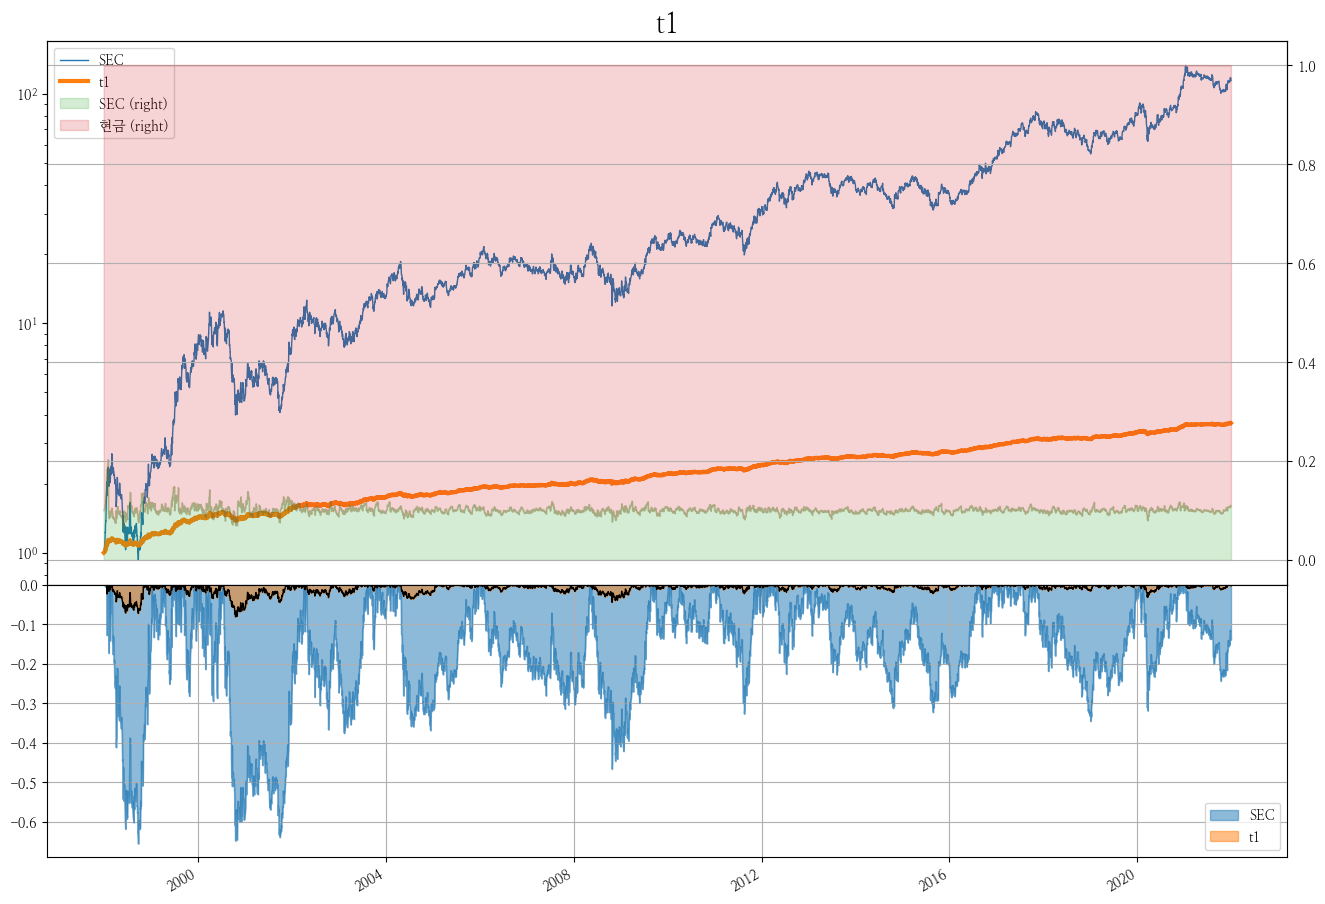

In [19]:
plot_assets(r_all, s, e, "t1")